In [5]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [46]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())     

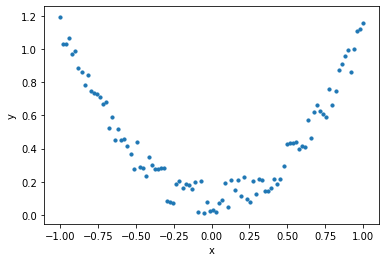

In [47]:
# plot
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [225]:
class Net(torch.nn.Module):
    def __init__(self, n_inputs, n_rules):
        super(Net, self).__init__()
        self.n = n_inputs
        self.m = n_rules
        
        self.mu = torch.nn.Parameter(torch.as_tensor(torch.empty(self.n*self.m).normal_(mean=10,std=1)))
        self.sigma=torch.nn.Parameter(torch.as_tensor(torch.empty(self.n*self.m).normal_(mean=10,std=1)))
        self.y=torch.nn.Parameter(torch.as_tensor(torch.unsqueeze(torch.empty(self.m).normal_(mean=10,std=1), dim=0)))
        
#         self.y=torch.nn.Parameter(torch.as_tensor(torch.empty(self.n*self.m*100).normal_(mean=0,std=1).reshape(-1,self.m)))
#         self.b=torch.nn.Parameter(torch.as_tensor(torch.empty(self.n*self.m*100).normal_(mean=0,std=.5).reshape(-1,self.m)))
#         self.b=(torch.empty(self.n*self.m*100).normal_(mean=0,std=1).reshape(-1,self.m))
#         self.b=torch.tensor(torch.unsqueeze(torch.empty(self.m).normal_(mean=0,std=1), dim=0))
        

    def forward(self, x):           
        self.inputs=torch.tensor(x)
        self.rul=torch.prod(torch.reshape(torch.exp(-0.5 * torch.pow(self.inputs.repeat((1, self.m))-self.mu,2)/torch.pow(self.sigma,2)),(-1, self.m, self.n)), axis=2)
        self.num = torch.sum(torch.mul(self.rul, torch.mul(self.inputs,self.y)), axis=1)
#         self.num = torch.sum(torch.mul(self.rul, self.y), axis=1)
        self.den = torch.clamp(torch.sum(self.rul, axis=1), 1e-12, 1e12)
        self.out = torch.div(self.num,self.den)
        return self.out

In [226]:
torch.manual_seed(19) 
net = Net(n_inputs=1, n_rules=5)     # define the network
# optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
optimizer = torch.optim.Adam(net.parameters(), lr=0.02, betas=(0.9, 0.99))
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

for t in range(2000):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    if t%100==0:
        print(loss)

/Users/yilin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


tensor(37.7856, grad_fn=<MseLossBackward>)
tensor(23.5319, grad_fn=<MseLossBackward>)
tensor(11.5091, grad_fn=<MseLossBackward>)
tensor(5.1391, grad_fn=<MseLossBackward>)
tensor(1.4504, grad_fn=<MseLossBackward>)
tensor(0.4532, grad_fn=<MseLossBackward>)
tensor(0.3093, grad_fn=<MseLossBackward>)
tensor(0.2994, grad_fn=<MseLossBackward>)
tensor(0.2689, grad_fn=<MseLossBackward>)
tensor(0.2216, grad_fn=<MseLossBackward>)
tensor(0.2025, grad_fn=<MseLossBackward>)
tensor(0.1958, grad_fn=<MseLossBackward>)
tensor(0.1950, grad_fn=<MseLossBackward>)
tensor(0.1950, grad_fn=<MseLossBackward>)
tensor(0.1949, grad_fn=<MseLossBackward>)
tensor(0.1949, grad_fn=<MseLossBackward>)
tensor(0.1948, grad_fn=<MseLossBackward>)
tensor(0.1948, grad_fn=<MseLossBackward>)
tensor(0.1947, grad_fn=<MseLossBackward>)
tensor(0.1947, grad_fn=<MseLossBackward>)


/Users/yilin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


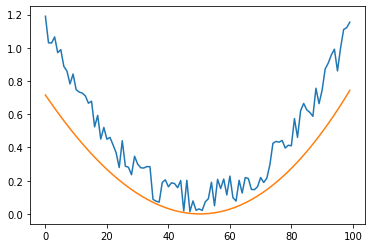

In [227]:
prediction = net(x)
# plt.figure(figsize=(10,5))
plt.plot(y)
plt.plot(prediction.data.tolist())

/Users/yilin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


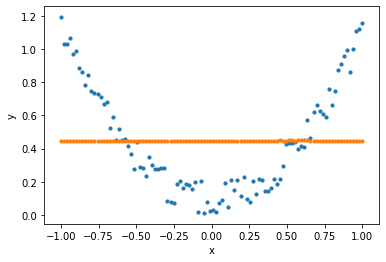

In [197]:
prediction = net(x)
plt.scatter(x,y,s=10)
plt.scatter(x,prediction.data.tolist(),s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
print(prediction.tolist())

[0.0, 0.001561235054396093, 0.006662355270236731, 0.013592337258160114, 0.02555241249501705, 0.037479497492313385, 0.05469076335430145, 0.07101432979106903, 0.09230836480855942, 0.12359790503978729, 0.13130059838294983, 0.18064270913600922, 0.2071908414363861, 0.21409474313259125, 0.27761295437812805, 0.27713119983673096, 0.3351934552192688, 0.35842984914779663, 0.4024851322174072, 0.4412829577922821, 0.41243061423301697, 0.4235372841358185, 0.4853958785533905, 0.49264854192733765, 0.5151063203811646, 0.5344467163085938, 0.5011795163154602, 0.43314388394355774, 0.43345126509666443, 0.4626215696334839, 0.4629646837711334, 0.36760374903678894, 0.47155308723449707, 0.46749812364578247, 0.37917083501815796, 0.3873147666454315, 0.3798302114009857, 0.40273091197013855, 0.3966664969921112, 0.3131391406059265, 0.36959803104400635, 0.3913137912750244, 0.3629283607006073, 0.47383537888526917, 0.4201373755931854, 0.3382438123226166, 0.18532100319862366, 0.20398691296577454, 0.5546462535858154, 0.

In [66]:
y

tensor([[1.1637],
        [0.9821],
        [1.0340],
        [0.9848],
        [0.8781],
        [0.8547],
        [0.8551],
        [0.8217],
        [0.8896],
        [0.7239],
        [0.8300],
        [0.7229],
        [0.6581],
        [0.6401],
        [0.5512],
        [0.5441],
        [0.5007],
        [0.5266],
        [0.4350],
        [0.5115],
        [0.4903],
        [0.4450],
        [0.4255],
        [0.4293],
        [0.3127],
        [0.3668],
        [0.4050],
        [0.2179],
        [0.3062],
        [0.2635],
        [0.2515],
        [0.2425],
        [0.1807],
        [0.1777],
        [0.2181],
        [0.1430],
        [0.2073],
        [0.0740],
        [0.1474],
        [0.0721],
        [0.0933],
        [0.0611],
        [0.0653],
        [0.1786],
        [0.1169],
        [0.1883],
        [0.1650],
        [0.0799],
        [0.0704],
        [0.0567],
        [0.1158],
        [0.1836],
        [0.0183],
        [0.0912],
        [0.1693],
        [0